In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import gzip
import json
import string
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Perform sentimental analysis on the Elon-musk tweets

In [2]:
muskdf = pd.read_csv('Elon_musk.csv', encoding='latin-1',on_bad_lines='skip')

In [3]:
muskdf.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [4]:
muskdf.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def text_cleaner(text):
    text = text.lower() #lowercase 
    text = re.sub(r'https://t.co/\w+','',text,flags=re.MULTILINE) #removing links which start with https://t.co/
    text = re.sub(r'@\w+|\#','',text) #removing @ and # characters
    text = text.translate(str.maketrans('','',string.punctuation)) #removing puncutation characters
    text_tokens = word_tokenize(text) #tokenizing words
    filtered_text = [w for w in text_tokens if not w in my_stop_words] # removing stop words
    return " ".join(filtered_text)

In [7]:
muskdf.Text = muskdf['Text'].apply(text_cleaner)

In [8]:
muskdf = muskdf.drop_duplicates('Text')

In [9]:
muskdf = muskdf[['Text']]
muskdf

Text
0                                             im alien
1             ray tracing cyberpunk hdr nextlevel tried
2                                       great interview
3                                   doge underestimated
4     congratulations tesla china amazing execution ...
...                                                 ...
1994  true sounds surreal negative propaganda still ...
1995  make sure read ur terms amp conditions clickin...
1996                                     samwise gamgee
1997               altho dumb dumber u0001f525u0001f525
1998                          progress update august 28

[1675 rows x 1 columns]

In [10]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [11]:
muskdf['Text'] = muskdf['Text'].apply(lambda x : stemming(x))

In [12]:
muskdf.head()

Text
0                                          im alien
1          ray tracing cyberpunk hdr nextlevel tried
2                                    great interview
3                                doge underestimated
4  congratulations tesla china amazing execution ...

In [13]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
muskdf['polarity'] = muskdf['Text'].apply(polarity)

In [15]:
muskdf.head(10)

Text  polarity
0                                          im alien -0.250000
1          ray tracing cyberpunk hdr nextlevel tried  0.000000
2                                    great interview  0.800000
3                                doge underestimated  0.000000
4  congratulations tesla china amazing execution ...  0.200000
5                                  happy new year ox  0.468182
6                 frodo underdoge thought would fail -0.500000
7                                        haha thanks  0.200000
8  indeed tweets definitely represent realworld t...  0.000000
9                        entertaining outcome likely  0.250000

In [16]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label > 0:
        return "Positive"
    elif label == 0:
        return "Neutral"

In [17]:
muskdf['sentiment'] = muskdf['polarity'].apply(sentiment)

In [18]:
muskdf.head(10)

Text  polarity sentiment
0                                          im alien -0.250000  Negative
1          ray tracing cyberpunk hdr nextlevel tried  0.000000   Neutral
2                                    great interview  0.800000  Positive
3                                doge underestimated  0.000000   Neutral
4  congratulations tesla china amazing execution ...  0.200000  Positive
5                                  happy new year ox  0.468182  Positive
6                 frodo underdoge thought would fail -0.500000  Negative
7                                        haha thanks  0.200000  Positive
8  indeed tweets definitely represent realworld t...  0.000000   Neutral
9                        entertaining outcome likely  0.250000  Positive

<Axes: xlabel='sentiment', ylabel='count'>

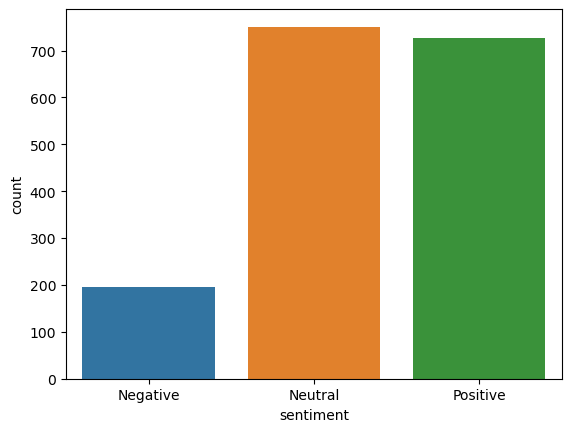

In [19]:
sns.countplot(x='sentiment',data=muskdf)

Added this below stopwords after analysing the highest unnecessary words using wordclouds

In [20]:
stopwords = STOPWORDS
stopwords.add('amp')
stopwords.add('rt')
stopwords.add('s')
stopwords.add('tesla')
stopwords.add('spacex')
stopwords.add('space')
stopwords.add('launch')
stopwords.add('year')

In [21]:
pos_tweets = muskdf[muskdf.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending=False)
pos_tweets.head()

Text  polarity sentiment
1836  impressive tianwen1 mars rover mission launche...       1.0  Positive
1298                                 lego movie awesome       1.0  Positive
1080                                one best shots ever       1.0  Positive
1723        mein herz brennt best boss battle song ever       1.0  Positive
340                 u0001f3a9 greatest gatsby u0001f3a9       1.0  Positive

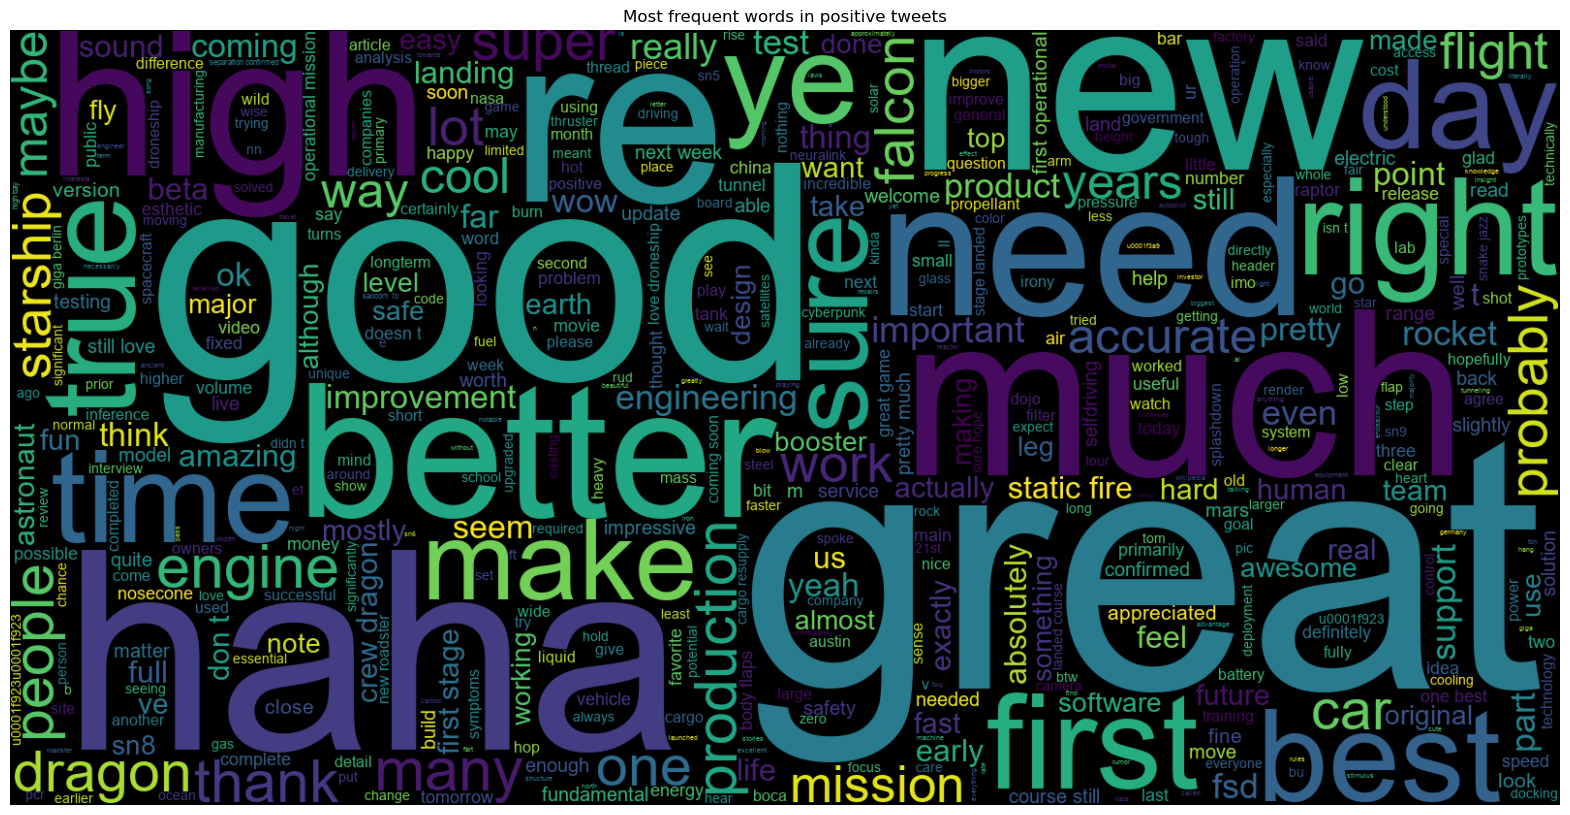

In [22]:
text = ' '.join([word for word in pos_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800,font_path="./arial.ttf",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets')
plt.show()

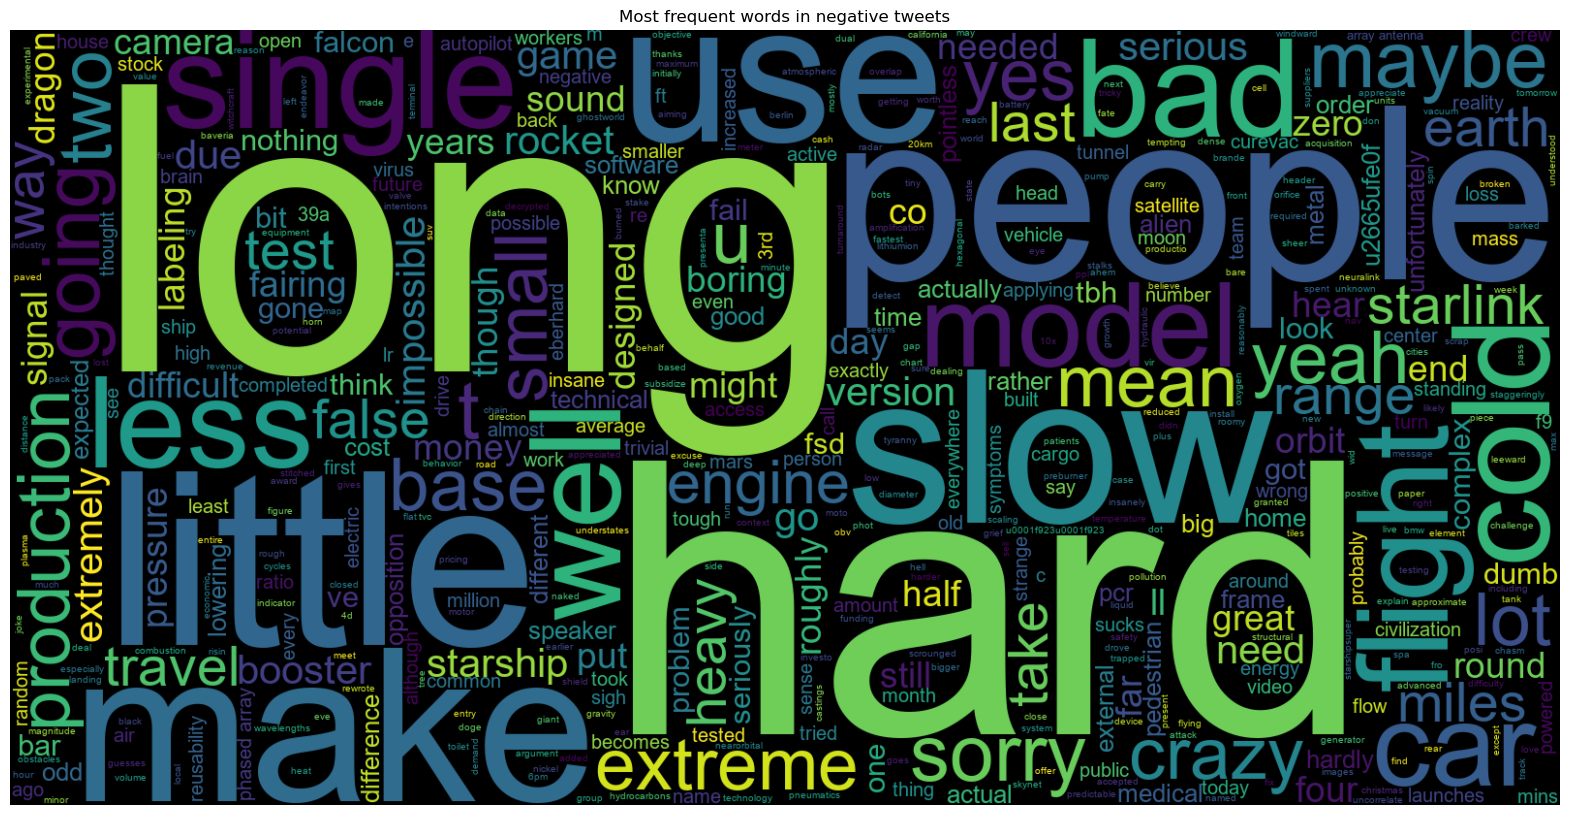

In [23]:
neg_tweets = muskdf[muskdf.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending=False)
neg_tweets.head()

text = ' '.join([word for word in neg_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800,font_path="./arial.ttf",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets')
plt.show()

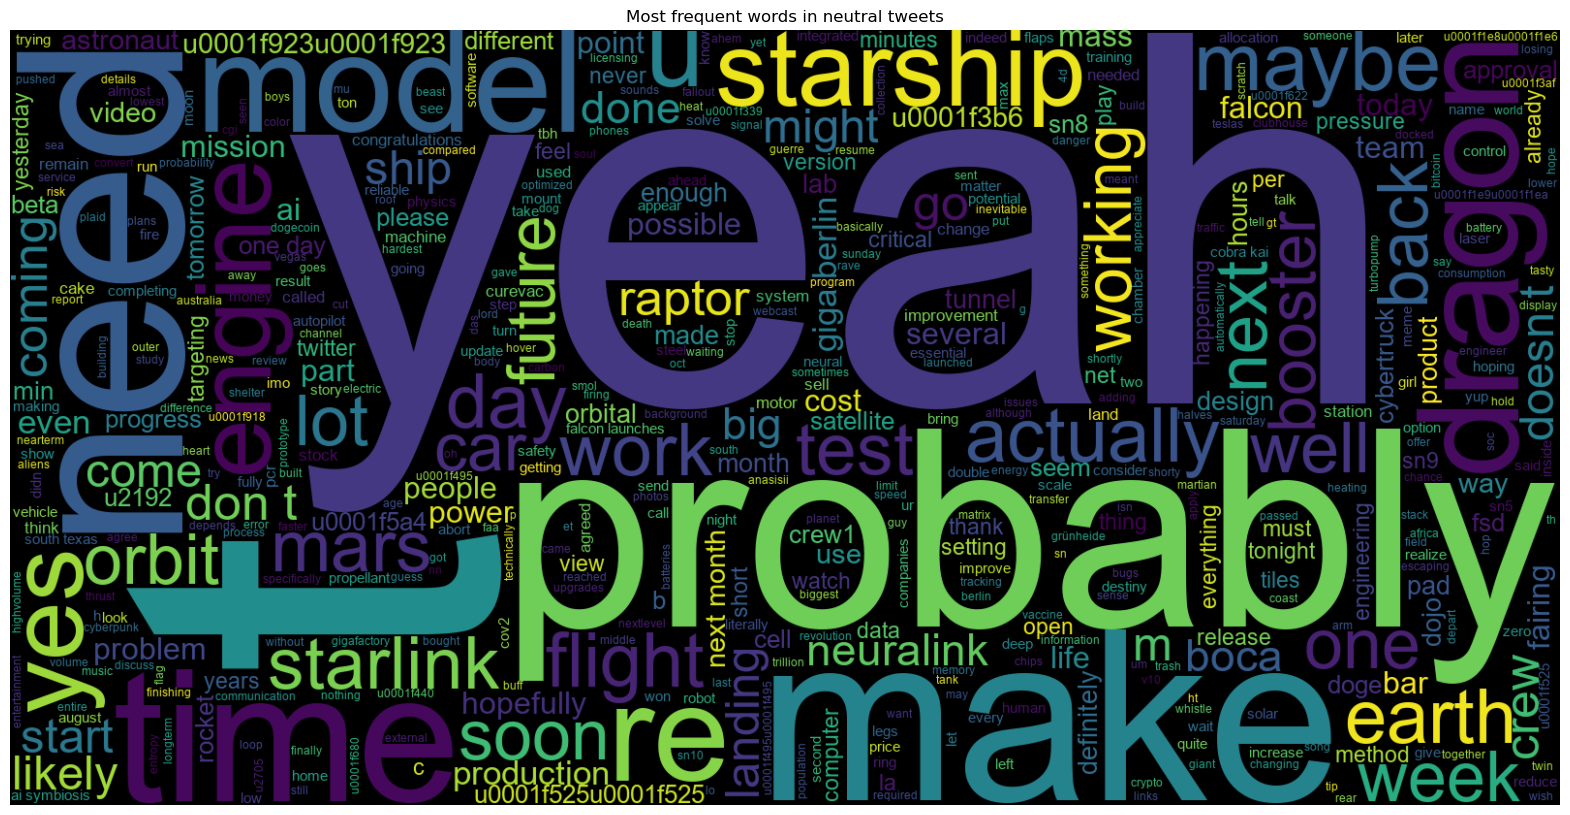

In [24]:
neutral_tweets = muskdf[muskdf.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending=False)
neutral_tweets.head()

text = ' '.join([word for word in neutral_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800,font_path="./arial.ttf",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets')
plt.show()

## Extract reviews of any product from ecommerce website like amazon

In [25]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

videoGames = getDF('Video_Games_5.json.gz')

In [26]:
videoGames.head()

overall  verified   reviewTime      reviewerID        asin  \
0      5.0      True  10 17, 2015  A1HP7NVNPFMA4N  0700026657   
1      4.0     False  07 27, 2015  A1JGAP0185YJI6  0700026657   
2      3.0      True  02 23, 2015  A1YJWEXHQBWK2B  0700026657   
3      2.0      True  02 20, 2015  A2204E1TH211HT  0700026657   
4      5.0      True  12 25, 2014  A2RF5B5H74JLPE  0700026657   

        reviewerName                                         reviewText  \
0        Ambrosia075  This game is a bit hard to get the hang of, bu...   
1             travis  I played it a while but it was alright. The st...   
2  Vincent G. Mezera                                           ok game.   
3         Grandma KR  found the game a bit too complicated, not what...   
4                jon  great game, I love it and have played it since...   

                                       summary  unixReviewTime vote style  \
0                  but when you do it's great.      1445040000  NaN   NaN   
1  But in spite of that it was fun, I liked it      1437955200  NaN   NaN   
2                                  Three Stars      1424649600  NaN   NaN   
3                                    Two Stars      1424390400  NaN   NaN   
4                               love this game      1419465600  NaN   NaN   

  image  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [27]:
videoGames = videoGames[videoGames['verified'] == True]

In [28]:
videoGames.drop(columns=['verified','reviewTime','reviewerID','asin','reviewerName','summary','unixReviewTime','vote','style','image'],inplace=True)

In [29]:
videoGames.head()

overall                                         reviewText
0      5.0  This game is a bit hard to get the hang of, bu...
2      3.0                                           ok game.
3      2.0  found the game a bit too complicated, not what...
4      5.0  great game, I love it and have played it since...
5      4.0  i liked a lot some time that i haven't play a ...

In [30]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332645 entries, 0 to 497576
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     332645 non-null  float64
 1   reviewText  332504 non-null  object 
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


In [31]:
videoGames = videoGames.dropna()

In [32]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332504 entries, 0 to 497576
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     332504 non-null  float64
 1   reviewText  332504 non-null  object 
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


In [33]:
videoGames = videoGames.drop_duplicates()

In [34]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254197 entries, 0 to 497576
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     254197 non-null  float64
 1   reviewText  254197 non-null  object 
dtypes: float64(1), object(1)
memory usage: 5.8+ MB


Considering only till 3000 rows for performance constraints

In [35]:
videoGames = videoGames.iloc[:3000,:]

In [36]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 8407
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     3000 non-null   float64
 1   reviewText  3000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 70.3+ KB


In [37]:
videoGames = videoGames[['reviewText']]

In [38]:
videoGames.head()

reviewText
0  This game is a bit hard to get the hang of, bu...
2                                           ok game.
3  found the game a bit too complicated, not what...
4  great game, I love it and have played it since...
5  i liked a lot some time that i haven't play a ...

In [39]:
from nltk.corpus import stopwords

In [40]:
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def text_cleaner(text):
    text = text.lower() #lowercase 
    text = text.translate(str.maketrans('','',string.punctuation)) #removing puncutation characters
    text_tokens = word_tokenize(text) #tokenizing words
    filtered_text = [w for w in text_tokens if not w in my_stop_words] # removing stop words
    return " ".join(filtered_text)

In [42]:
videoGames.reviewText = videoGames['reviewText'].apply(text_cleaner)

In [43]:
vglst = [x.strip() for x in videoGames.reviewText]

In [44]:
vglst[0:14]

['game bit hard get hang great',
 'ok game',
 'found game bit complicated expected played 1602 1503 1701',
 'great game love played since arrived',
 'liked lot time havent play wonderfull game simply funny game verry good game',
 'bought game thinking would pretty cool might play week two done boy wrong moment finally got gamed fired commentors right takes forever u forced create account watched booted could tell right bat alot thought went making game ever played sim city game must try easily navigate thru multi layers playing htis month straight still discovering layers complexity game things game could used tweaked 5 star game',
 'played old anno 1701 1503 game looks great complex previous versions game found lot things lacking sources power inability store energy batteries regenertive fuel cells buildings game need power trade main beef requires internet connection wonderful artistry graphics anno 1701 set future world global warmming flood land resource scarcity sent human kind lo

In [45]:
from spacy import displacy

In [46]:
nlp = spacy.load('en_core_web_sm')

one_block = vglst[6]
doc_block = nlp(one_block)
displacy.render(doc_block, style='ent', jupyter=True)

Let's now try to take the parts of speech for the words

In [47]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [48]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [49]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [50]:
videoGames['sentiment_value'] = videoGames['reviewText'].apply(calculate_sentiment)

game bit hard get hang great
ok game
found game bit complicated expected played 1602 1503 1701
great game love played since arrived
liked lot time havent play wonderfull game simply funny game verry good game
bought game thinking would pretty cool might play week two done boy wrong moment finally got gamed fired commentors right takes forever u forced create account watched booted could tell right bat alot thought went making game ever played sim city game must try easily navigate thru multi layers playing htis month straight still discovering layers complexity game things game could used tweaked 5 star game
played old anno 1701 1503 game looks great complex previous versions game found lot things lacking sources power inability store energy batteries regenertive fuel cells buildings game need power trade main beef requires internet connection wonderful artistry graphics anno 1701 set future world global warmming flood land resource scarcity sent human kind look deep ocean valuable min

amazing value believe set available price everything packaging quality paper stellar set feels like put together care mind also worth noting fact ocarina time guide found set criticism cloth maps included twilight princess wind waker still im happy purchase
starting collectingthis one best item get
great set guides shipping damage books great shape misprints upsidedown pageswell worth investment
im huge zelda fan im happy add collection
bought future investingcollecting paper included isnt personally signed guyits copy actually dropped price 40 last 9 months since purchased
happy purchase
div idvideoblockrq6p1t4no5ild classasection aspacingsmall aspacingtopmini videoblockdivinput typehidden name valuehttpsimagesnasslimagesamazoncomimagesie1zmfyi4lrsmp4 classvideourlinput typehidden name valuehttpsimagesnasslimagesamazoncomimagesi11zl7xqwcaspng classvideoslateimgurlnbspwatch higher quality httpswwwyoutubecomwatchvqhocd4brrlw giving away brand new copy collectors guides phantom hourglass

great
didnt work xbox one rockband sure blame obama
works well wii guitar hero games well dance
works great
nice
microphone unbelievably good studioquality simply find mic good less 50 problem trying get mic stand since doesnt screw even wasnt hard overcome
great replacement mic rockband always hard time tapping portion game oem picked taps perfectly 100 score singing cowbell anyone
awful controller tamborine slaps rock band 4 dont register went official mic things much better
works great sounds great
bought use band hero voice games xbox 360 worked well plugged xbox 360 without issues microphone worked properly seller described voice heard clearly able play games usuing mic great deal price would recommend
got use rockband ps4 works
works well part two times making static noise unplugged replugged ok
bad product working xbox pc
bought microphone game michael jackson experience sing songs niece nephews love soon arrived hooked right away
doesnt work xbox
works better rockband one altho

graphics arent good ship shore radio distorted accented impossible understand said game fun looking ocean going version microsoft flight simulator isnt lousy game great game okay
made controller easier grab easier hold comfortable hands overall would buy cheap great addition controller
ive bought slip right unless get one obvious defect last years must afraid kids messing controllers maybe get lol
put controllers would like get wear tear great buy amazing
bought amazon seller likeelectronic ship fm hongkong 3 shipped one got fits controller excellently smooth rubber feels comfortable playing games dont even notice hands sweat lot call duty hours sessions without case adding onto controller pretty much eliminated great case seller
scared stretch silicone application afterward fit snug makes controller feel much better
son loves says makes comfortable easier hands marathon black ops 2 sessions
greatest gets job done price complain pretty delicate rubber expect
like product means little c

glad purchase 128mb memory card recommended amazon another gamer
daughter still loves play station needed bigger memory card couple games searched amazon found order
cam quick works like new everything expected plus cheap
memory card unleashed games start dont stop gameplay awe yeah lets get lunch save gameplay holds well saves loads reliably card save games
huge memory ps2 great save games save money
works great suggest anyone great price well overall im happy purchase
old fat ps2 far problems memory card inexpensive lots storage space great buy
much say item except suppose stores lot games
want play ps2 games needed memory card fits bill fine hold many games buy able games
great little cards store games onit save money also come handy thank brenda oneal
supposed nice extra memory store game saves satisfied purchase
every memory card 8 mb young could owned 1 budget memory space cant even fill tenth thing awesome
div idvideoblockr1hcqt1uo5ogtm classasection aspacingsmall aspacingtopmin

purchased wii nintendo longer produces wavebird controllers virtue sued patent owner technology didnt want pay used wavebird ebay bought sit back hdtv 9 feet needed wired gamecube controllers work well even mario kart wii lag wavebird lag extension cables highly recommended
great
great extension cable quality solid range decent
cheap quality product almost doubled controller wire sit far away tv doesnt seem add noticible lag recommended product
perfect expecting
works exactly advertised bought along 2pack controllers gamecube tv ways away couch wanted play multiplayer wife controller plugs extension cable snugly controller end extension cable plugs gamecube say plenty snug enough keep moving controller cable around semiviolently snug enough keep controller attached thrown across room example one major concern bough possibility lag due signal controller travel farther concern unwarranted noticed difference response time either way durability ive almost 2 years havent shown noticeable si

legends one rare megaman releases takes place 3d world opposed traditional 2d side scroller mm fans familiar legends legends 2 among best made story driven 3d adventure games psx massive sometimes daunting library
never forget first time played game friend mine talking months finally able borrow playstation rent copy game really fun action rpg elements mega man indiana jones zelda
already game terrible condition due lending something certainly dont anymore favorite megaman game period along 2 get regrets besides 2 copies game one case disc seen better days newer complete copy reminds original copy prime
megaman legends undisputed favorite game time bought 1998 played lovednbspa datahookproductlinklinked classalinknormal hrefmegaman3dpb00004svs5refcmcrarpdrvwtxtieutf8mega man 3anbspfor thenbspa datahookproductlinklinked classalinknormal hrefnintendonessystemvideogameconsoledpb00004svyqrefcmcrarpdrvwtxtieutf8nintendo nes system video game consoleanbspwhen young game nothing like game meg

original tomb raider landmark game playstation start long running series holds well definite acquired taste tomb raider begins adventurer treasure huntress lara croft hired business woman jacqueline natla search ancient cavern peru piece scion ancient talisman great power however finding piece lara betrayed jacquelines men race across world find remaining pieces scion jacqueline attains mythical power tomb raider early playstation game unfortunately graphics havent aged well although many set pieces game impressive levels tend feel samey despite games length impressive fifteen massive levels hidden caches ammo first aid packs giving great sense exploration throughout game lara moves stiff fashion controls tanklike hold button walk takes long jumps running jumps delay requires plan jumps ahead time cases fortunately training mission lara instructs play home game primarily puzzle platformer level contains series puzzles test problem solving skills scattered throughout many ruins caves vi

thank gamemy nephews keep playing game say much fun keep fighting see going win game thank much
originally playing rogue leader star wars rogue squadron 2 great get back keystone started whole franchise allowing advanced gameplay future games product fantastic age n64 era gaming much needed classic add collection sure
one best star wars games ever made par jedi knightdark forces 2 knights old republic one first games nail dog fights 1st star wars films controls great easy get used shows planets new familer films like hoth star wars nut like get
many n64 games brighten new generation gaming game sharp graphics also great gameplay challenging
ordered fiance christmas ill say hes night playing almost late work
game crappy unfair enemys cheat respawn making impossible compleate missions either defend man time die
game works every time good purchase shipped fast
great game
game works described condition also good condition pleased
awesome game love
love nintendo 64 still play games occasion

okay still dont see everyone talks game hear online great maybe gave way high expectations good id hoped
works good
game overrated dont get sucked hype nostalgic people played first came graphics honestly really bad controls make feel like youre drunk guess thats fun though honestly really like game played although gameplay schematics bitstrange oddly addicting multiplayer lot fun though friends sitting basement hooked get pretty intense split screen seriously 5 stars split screen 4 stars overall gameplay repetitive graphics vomit could better time period n64 capable handling better still worth buy get
good gift n64 makes great gift gamers super nostalgic fun game complicated timeconsuming lot fun
one best video games ever redefined everything copy came good condition without scratches writing
loved game younger bought still love
game totally mind blowing many areas cover hours play awesome amazing graphics much conquer 5stars buy game worth money
great game
multiplayer amazing reviews

described
great game came fast
game arrived good works
game came fantastic condition love playing sis went college
good
love game coolest game ever brings back great memories childhood playing game never gets old play
weekends high school revolved around playing game friends yelling ingesting copious amounts koolaid chips maybe nostalgia talking even today game insanely fun play lets remember n64 cartridge system ahead time player memorable games past 30 years mario kart 64 definitely one games graphically gorgeous 90s colors vibrant character models blockyantialiasing wasnt cared much back music freakin rocked game play excellent racer feel tons power ups weaponized items truly jack competition helps create frustration last second finishes losses probably ever nostalgias sake get game pop disregard looks blocky new tv enjoy memories
plays great look forward beating fance place bets win looser chores
even improvements systems games graphics etc one remains classic sense word
favorite s

good expected recommended
fun wrestling game
nice
love
like video game
purchased quite games trying find one remember game fun good roster characters moves simple game fun hours end good way relax tiring day
love game takes back games like made shipped fast always though game dirty little water paper towel fixed right
time favorite wrestling game ever made really enjoy game alot modes exhibition tag team special matches like 2 1 also 40 player battle royal time favorite feature game ever winning titles game alot fun game alot better overrated smackdown comes pain alot easier game well dont get people say smackdown comes pain great reality sucks ai season mode cheap hate ai like game easy mode ai way easy game awesome still play game alot day never get tired
remember game first came mind blowing awesome basically anyone everyone youd ever want wrestling game minus legends 4 controllers 3 friendsit going hours well game still pretty cool despite age graphics obviously dont look awesome u

game came time works game pretty bad opinion would stick 2d whipping action looking fun choose 2 pretty lame characters camera angles good gameplay self great get game add collection game waste energy
classic many reasons one first major releases fps genre looks feels like pc version least memory fun always remembered
password feature graphics lacking ps1 era saving game original pc version 2 copies well doom 64 doom 2 doom 3 saving features teatures gradient reminiescent old 3d maze screensavers older windows machines graphics could smoothed bit games ps1 library better graphics original dos version doom better graphics controls responsive fluid music damn awesome game comes special padded longbox gameplay fun repetitive due password system sucks level design excellent postives neagtives regardring doom ps1 negatives major screwups irritate great game recommend buying port go play doom atm something doom atm httpsyoutubed0rstdhowagt7m16s
great play doom nice controller instead keyboar

classic old school classic
dint get game almost year ago still find pretty fun tiny roster ten guys extremely outdated recognized guys several among favorite wrestlers one completely unfamiliar ahmed johnson think graphics really good although wrestlers arent large screen gameplay done pretty well game isnt realistic think adds fun people seem issues load times dont really think load times bad ive played games much longer load times think game much better wcw vs world one two wrestling games ps1 even though game many guys
game boring around 30 wrestlers ten real wrestlers punce kick signiture move worth
old school
great product fast shipping
true masterpiece buy another true ps1 classic
years since played original game tell brings back many good time memories hadnt finished game yet continue enjoy game
love game
case pieces disk scratched priced high quality received
game great favorite series
nostalgia powerful thing fondly remembering simple playstation 1 days playful idea playing tw

like nintendo 64 also really enjoy watching mortal kombat movies playing mortal kombat games yeah
time favorite arcade home great classic far fighting games went back time works wonderfully thanks much
works good arrived time
gift 11 year old grandson said really awesome
awesome game
see photo dust totally disappointed opened case see disk unclean way
helped bring series fruition back 90s tremendous opportunity see play developer naughty dog great idea sony helped succeed love gameplay graphics music humor lots great animations funny sounds oombadegha youll play game find im talking im proud part success series real tribute goes millions gamers bought game enjoyed fruits labor love oombadegha
played kid wanted play got works great plays well
game kid blast still
mk4 superior fighting game mouth watering mortal kombat deadly alliance mk4 classic fighters scorpion subzero reptile sonya liu kang jax plus fighters introduced flawed subzero mytholiogies quan chi shinnock plus new mk4 tanya 

disc exact condition specified came everything said exactly expected
game remembered came less perfect condition although didnt realize changed dialogue characters original version greatest hits honestly couldnt begin imagine nonetheless amazing game lots hidden areas test reasoning gaming skills made head hurt first several years owned original copy fun premise great people ages expert beat game five hours relies much simple skill like modern games even though second third entries great honestly longer kind regretted didnt take much advantage environments first guess closing complex fun
good shipping game plays well
game brought many memories games used play ps1 one top 10 played demo kid bought recently ended beating game 100 days oo say game worth play u continue series
classic game ps1 love still makes smile like kid new verisions cant compare original whether 90s child trying relive childhood want share new generation hours fun everyones favorite purple dragon
plays great box crac

ive addicted spyro since little kid original game got hooked im terrible video games love play im sure experienced gamers could beat kind game eyes closed quite challenge enjoy
fun game never played dragon attitude kick butt found spyro
well million reviews already makes even easier one original best actionadventure games ps cant go wrong spyro proceeding sequels owned game back nephew somehow lost completed fully im play even though like 8 years never got sequels im getting got 5 playstation classics go including spyro 2 3
fast service fair ups likely cracked case missed playing game
return green label lets use unlimited ammo cheat
one best games playstation
true masterpiece buy classic reason good
one best survival horror games time ya dont know ya know
bad ass game live whole series game far great job making games lost one
ive playing series since 10 first game played remake first resident evil also played series code veronica resident evil 5 resident evil revelations resident evil 

first mario party best mario partyholds lot nostalgia werent stick spinning minigames id rank top 3
remember sitting behind steering wheel arcade playing game know brings back lot memories
son play one together lot yet best playing game fun
fun think little less fun next one crusin world game playthrough always follows exact path tracks fairly boring
presentation back day nintendo wanted another fun multiplayer game create doesnt exactly involve racing thus first many mario party games created lets see new evolution one influential franchises gaming gameplay one first nintendo games include 4 player multiplayer boy people love basically game like board game start 10 coins roll dice determine go depending spaces land fortunate things happen unfortunate things end gaining losing coins end turn 4 players compete minigame winner chance win 10 coins want coins enough buy star toad maybe even boo steal one youve made whole lap around board depending time game koopa troopa give neither 10 20 

one classics syphon filter 2 loved game 12 years ago wanted buy play fantastic rollings weapons great game
original syphon filter trilogy set standard arcade style military third person shooter generation console whether youre old school collector someone thats looking properly emulate old school games pc game one every good boy girl
syphon filter awesome game pretty advance stealth reminded mg splinter cell wish would remake others ps3 updated graphics
worked exactly advertised came packaged neatly play donkey kong 64 majoras mask
awesome seller item works like charm simply love play donkey kong 64 would business
games enhanced required play expansion pak aidyn chronicles first mage gauntlet legends hybrid heaven pokmon stadium 2 resident evil 2 road rash 64 shadow man star wars episode racer turok 2 seeds evil san francisco rush 2049 south park games require expansion pak play donkey kong 64 singleplayer mode perfect dark multiplayer mode starcraft 64 legend zelda majoras mask
works 

nintendo 64 memory expansion pak upgrade vital part terms plugging playing many great titles already released console titles absolutely require upgrade legend zelda majoras mask donkey kong 64 two titles example accessed without upgrade perfect dark one title offers minimal gameplay locks players many richer features due lack available memory run features properly think youll find even donkey kong 64 perfect dark zelda majoras mask isnt thing youll still wanting consider purchasing ram expansion key reasons 1improved gameplay details lot games weather know offer fine gameplay oriented details available without extended memory games capable improved framerate improves quality onscreen action prevents slow effects lot screen action occuring example programers implement textures details environments characters making things look lively life like ai artificial intelligence improved become smarter 2 second drastic improvement audiovisual quality people dont understand computer games really 

authentic game obviously perfection wonder games stuck around long warned order games amazon dont always know youll get mail second attempt got lucky found seller authentic game tell first hand worth im even upset first attempt game good play havent already youll understand many people bought still buy love
works great thank
truly classic game grew playing pokemon dont hesitate pick copy pokemon red blue gameboy color found pretty cheap used go attic get sure emulate games phone experience isnt actual nintendo hardware provide overwhelming onset nostalgia youll feel kid far game redblue flagship gameboy games become classics every sense term incredible much fun adventure could packed cartridge little onboard memory purchase one swap save battery get cr2025 theyre cheap easy replace dont worry use tape need soldering youll playing hours hours come youll find humming old town themes battle soundtracks game wonderful wont regret spending 30 bucks best buy values likely increase time
90s k

happy recommend
good product works perfectly problem stickers back part box thats devaluate product
excellent product 1010
expected
ordered product sunday took 4 days arrive buying options section saw sign said good ordered came description oh way order unlock luigi must go first save file hit start say copy copy save file go copied save file hit start go clear hit select button itll say erase data data deleted erase data get play luigi yeah anyway seller got sosa games also really fun game also hard anyway recommend game whoever buying gameboy color one
purchased lime green gb color sosa games used good condition came within week gb excellent condition functions 100 impressed sosa games even put brand new screen gb even came matching battery cover advice recommend purchasing one games look seller profile really look conditions descriptions post picture theyre selling extremely happy purchase
product almost looked new screen little scratches could barely see
thanks
came broken dont buy

quality listed good poor side analog feels broken feels buttons sticky work 25
described well clean great product ive playing weeks feels nostalgic using like new controller
take someone wastes life super smash 64 controller firmest joystick ever felt highly recommended
works expectations wish didnt demand certain number words since dont much say
used original nintendo brand n64 controllers far superior new aftermarket brand controller ive tried aftermarket brands end falling apart literally otherwise breaking used original nintendo brand controllers still function main weak point original nintendo brand n64 controller stick almost always part fail much sellers know firm stick selling point question whether happen long fix worries stick gets loose buy stick replacement replacing stick far less troublesome issues ive faced aftermarket brands completely satisfied purchase
looked good joy stick broken pay get fixed still wont good
best used controller bought hunt stick worked great well b

tarzan one best games ive ever played first bought game 7 years old 16 hardcore gamer still love playing game graphics top notch gameplay fun addictive tons cool moves use well 3 difficulty levels challenge skill level whether youre hardcore gamer brand new video games great game get
tarzan mix modern platformers old school style side scrolling action succesfull mix results lot fun game play tarzan adult kid terk camp level amusing jane sequence graphics good capturing spirit jungle lots creatures wondering around light treetops lots disney always good delivering great music enjoyable tarzan diffrent bongos drums themes movie 3 challenge levels give taste difficulty different ending one levels also cool neat play unfortunity tarzan suffers serious problems pretty much gaurantee get annoyed jungle creatures try kill quest manhood survival especially stupid birds bombard coconuts yet never kill whats monkeys also annoying also moves difficult young kids pull final two levels really diffi

love game big fan ff games quality game received amazing thank entertainment
say ff7 incredibly difficult beat game enjoyed game much hope remake sometime future
never played game year wanted see game lived name previous experience series includes x xi touch xiii say enjoy parts x whole hate games hatred stems hours cut scenes hours actual gameplay also like rpgs roaming element like able explore like finding sidequests items get titles expected ffvii riding reputation bad news first playstation 1 game oh look ugly game battles arent bad cut scenes could worse walking around bad exploring area often difficult identify exits ramps ladders various switches theres command highlights ladders exits areas ramps switches still hidden option saved headaches aesthetically displeasing rpgs hadnt started journal thing yet skipping dialogue even accidentally coming back game busy week lead confusion combat system combat isnt intuitive many status effects easily break game bit bad luck good news ch

pick 15 characters ryustridermega manzangiefmorrigancaptain commando captain america spider manvenomjinhulkwolverinechun ligambitwar machine onslaught boss game akumaken onslaught playable code game fun hyper fast gameplay game 15 characters muchbut made fastnice gameplay people whine graphics say bad compare tekken games category 2d games drawn 3d games polygon based graphics different types things dreamcast joystick longer madebut still want play game got solutionget playstation 12 adapter buy ps2 psone joystick fun like arcade recommend game people like cross games like xmen children atom marvel super heroes vs street fighter version best arcade perfect pick play feel like fighting heroes pros fast gameplay great graphics awesome charactersfun playpull huge comboswhen using arcade stick enhances gameplay cons enough characters dreamcast controller good game 2d graphics everyone
game good entertaining would give five stars make sure play friend truly appreciate
great game lots fun ga

yellow dot eats lots smaller dots debuts first 3d platforming adventure controls nice friendly visuals pretty gameplay bunch jumping bopping enemies original pacman arcade game included well posteritys sake original ideas interesting uses classic material pacs past integrated nearly perfect meld old new title went inspire marioesque series spinoffs lasted end following console generation great whole family runs playstation 13
oh fun playstation pick rights classic pacman game like sonic hedgehog several formerly popular characters plus great gamehappy gaming
product excellent works well recommended buy fun good
played game small love game came fast shipping game came good condition came disk case original booklet great game great job guyz
game good actually talking dont read everything pretty difficult way fun short storyline game works great unable read disc errors anything like downfall pacman world 2 gamecube ps2 going slightly disappointed pacman world 2 way better thats opinion gr

say many things dreamcast even play games battery messed poked reader get games working replaced battery together holder got working dreamcast
excellent
sega dreamcast work fine im able play old dreamcast game still
believe console failed large promising library games thing flunk received minimal wear wiped use looked good new
glad could revisit old games
never failed yet beaten games got still works like new
still works
system allowed reexperience much fun years ago resident evil games shenmue railroad tycoon 2 games great piece hardware powers love ease organizing game files visual memory units way time date settings remained accurate long time periods even system unplugged really worth
never got great system graphics like ps4 sbox done love games
console today still great many games console still easily find day still compatible modern televisions thanks svideo capability console classic also many hidden gems really go wikipedia article start drool vmu capability four ports controll

product worked well along dreamcast items ive recently purchased says works fine dreamcast needs
like direction sega took memory cards time really thought future controllers memory cards mightve half right guess would give item five star werent one thing really dont blame sega uses lithium battery reason mine always seemed die even noticed bad sega good ideas harder execute time
great item love visual memory unit first visual memory card
purchased husband one damaged flood home kept almost new condition always wrapped purchased one hoping cheer losing took weeks get wasnt shipped 1 week inquired lod dirtier described spent 1 hr cleaning happy get disappointed shipping condition
replacement original broken since used often much
nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play

looking nostalgic experience nothing better baby playing 4 players like old days friends really bring back great childhood memories came used worked normally game load screen turn sure blow inside cartilage good quality quick delivery
game much replay value used rent game time never got buy kid im glad bought came like perfect condition
case doesnt hold disc one place game discs manual good condition
say game great surprised still functioning usually expecting work though ill wait see one good unknown games 90s recommend people old systems though cant offer guarantees since using old playstation nowadays
great game really hard takes long time develop skills etc innovative time though creating armor weapons even food also many characters choose given decisions bit old given everything many people would play believe got last boss got demolished gave deleted file years ago ps2 version think issue actually better reason last bosses games pulverize give rotney anotha chance lol jackie joke 

waited quite dungeon keeper 2 come bought immediately one hand great sequel people played dk1 easily able pick moving units building rooms lining corridors traps graphics better sense theyre geared towards future development instead pixelbased graphics creatures rooms drawn polygons makes monsters look clumsy mean future graphics much smoother cleaner going dungeon possessing creature cause creatures turn cloud dots rooms roam still crisp easy see roaming dungeons one true pleasures game extra rooms youd hoped much sequel took long make casino neat jackpotwinning minion starts dancing singing wins disco inferno rooms better graphics though henhouses hatchery onwall bookshelves torture racks everything shows subtle touch choosing dk1 dk2 id definitely recommend people get game challenges gameplay dk2 better dk1 dk1 many new extra features like pet dungeons new players appreciate well crafted game fun challenge experienced players appreciate subtle differences old new version dont expect

loved game instant installed funny imaginative actually allows ride rides far easy aimed toward younger audience never put would reccomend game anyone enjoys sim series disappointment lack updates game outdated longer run pc windows xp installed wish newer version would released play one time favorites
great game excellent story addictive
game brought back many memories came condition description worked perfectly
true classic players assume role cocoon master remote village plagued roaming monsters folklore unravel story tamamayu hunt raise combine monsters summoning battle
outstanding
another childhood game buy loved game growing im glad bought product came fast free damage brand new
game would work computer compatable windows 8
quite fun fan much limited though
good game
wont run newer computers need remade windows 8
favorite classic game
used play game hours time younger looking stores long time didnt even think checking saw ordered right away challenges beat order get different lev

game addicting called starcrack endorsement illicit use drugs im saying could problem learning curve steep tutorials excellent even able catch complex strategy game im trying figure use science vessel isnt easy im hoping isnt going get stupid difficult ive found slowing games time clock give time manage campaigns installation froze surprisingly able call tech support talk person downloaded installation program issues may issue slow connection dont internet another surprise old old game able use dual processor capability running smooth desktop xp put system sleep bring standby without issues great blizzard continually upgraded software become dated great game wish god would give us ten years already play games unfortunately isnt happening judicial use time key able enjoy game easy miss meeting let whole evening pass game mesmerized careful
starcraft battle chest great addition gaming love game bought get ready play starcraft 2 would definitely recommend game
even though older game still

fan original two rb games ordered game got new pc windows problem get jitter everytime move joystick tried new joystick didnt fix problem inquiries sierra went unanswered game cool fly straight line go gives motion sickness anyone else problem
good descent ww1 sim must remember sim old graphics going best world sort classic planes probably handled particular time
diablo game changed everything high hopes expansion expansion published sierra blizzard shows install insists installing bloatware monk added playable characters well thought monk hand fighter instead uses staff like wizard special ability locate treasure nice search skill learned book unique like trap finding rouge smithing skill warrior monk disappointment lot new items mostly traps adds items player find many good items raises probability finding find new quests old game fun wont run windows 7 dig old xp computer could play glad blizzard allowed publishers create expansions since glad played expansion dont think worth price

nostalgia fun
vigilante 8 game vigilante 8 2nd offense similar ps1 rowdy characters team drive compete survive explore various places great story game vehicular combat choose many vehicles vs vehicles giant ant meteor crater arizona japanese version vigilante 8 2nd battle region ntsc usc one ntscj japan 1st version us vigilante 8 ps 1 also game came complete photo display video game ps one
good first game definitely great game
love game love games like glad someone cause thank good sirmadam
bought game gift happy get product described sipping fast received expected delivery date
jjgames sold good price pretty scratched comes wo case one best ps1 games ever played pure destruction
definitly improved first one upgrading vehicles like one one fun
though tell xl best xl doesnt analog support besides tracks 3 hard enough female voice ships computer helpful irritating music great like psone games drop computer rip chemical brothers influence probably favorite song id reccomend wipeout fusion

loved game lot fun would recommend seller others
game classic brought back child years addicting remember cant put
first game playstation loved received game played day game great condition cheap
hard surpass disc works well case good condition maybe one day beat
tried using game ps1 ps2 neither worked game lightscribe disc looks mass produced someone
like beat little replay value better expected fact one best games nintendo 64 first time around
game good conditions childhood game warning buy game pack memory card n64 dont already one save youll start dont save progress thatget
love game great kids challenging game lot fun puzzles finish pretty quickly bare minimum much game camera little annoying always change camera views c buttons
case scratched little buy used
husband really enjoys game master virtual board get butts kicked lot fun disc arrived good condition problems thanks
could trick computer selling property 150 200 dallors entire board computer
disc good condtion plays well
mi

order days ago came longer three memory card mainly wanted rumble pak ill let anyone plays fourth player use three rumble paks controllers order memory card yet order said like new guess actually came brand new sealed hard plastic normally takes scissors cut like seller mean say also ordered used section also weird still got new im sure know like people said rumble pak kinda heavier im even going use anyway already rumble pak controllers thing really hate rumble rumble paks take triple aaa batteries problem batteries run advice people purchasing want rumble pak try find rechargable triple aaa batteries way memory card also used alone without rumble pak powered controller though guess thats old school
rumble pak big uses batteries rapidly heavy hardly ever feel rumble nintendo builtin rumble thre controllers sucks
never played game bought 2011 didnt really know expect besides reviews ive read horrible bought building n64 collection always big south park fan games reason pretty pleasantl

played main silent hill games didnt game years ago recently decided finish see really held first wasnt sure well held played better got big difference game comparison later ones psychological aspects less welldefined result feels less cohesive later games thats say doesnt sad scary moments though definitely latter former held back dated technology bad voice acting actually still like graphics distinctly rusted bloody design parallel world shines fine textures special lighting effects realistic prerendered cutscenes still hold well unique aspect scenes dialog whatsoever artistic challenge paid conveying characters emotions better unearthly voice acting could voice acting good actors seem miscast suffer uneven performances doesnt detract much experience trigger eye rolls cynical audiences music less distinct later games favors odd disturbing tracks heaven go ahead look youtube less melodic industrial hand weapons monsters environmental noise sound effects fit game well serve make silent 

game came shipped original case manual two discs game works perfect warn first boss game occurs early bit difficult new players game one best games terms storyline mustget player looking storyline heavy depth
fun game tough learn controls great game
metal gear solid fans metal gear solid started getting popular worth money played game kid
one greatest games ever buy
wanted replay game bought game works great
bought nephew christmas know game unique type worth playing
got game today nostalgia kicks seen bro play many times didnt anymore buy game play want try play every single game series
im writing review future well really one several classic games 2014 still worth buying playing supposedly playable ps2s ps3s favor pick good used ps1 reputable seller whole bundle stuff cost less new games
speaking behalf boyfriends instead played metal gear games time
metal gear solid one best games ever played game play another 20 years still fun playing
ive never played lot ps1 classics safely say t

bought sega saturn worked great issues great replacement need one
exactly says
know ac cord glad ac cord work described seen dont even work get hot throw away cord set like kinds thankfully
first mk game try 3d okay great controls arent bad good mk games graphics okay nothing special id say fans series general gamers
liked game control ps1 games would compare mortal kombat games
exactly described
worked playstation doesnt fit exactly way
product exactly described arrived expected
works advertised powers ps3 without discernable issues
missed game much years im glad bought never seen endings type 3d
good great graphics smooth controls gory brutal fatalities well balanced bad weak roster awkward animations weapons still feel kind useless mortal kombat 4 probably carefully watched game series due abandoning 2d root going 3d one knew going happen series lot fans lost hope thinking silky smooth controls excellent digitized graphics would go wayside 3d however game featured excellent visuals 

sure describe soul reaver unique experience one games require patience since theres detailed map missions one mission basically need figure make progress exploring surroundings paying attention story might get lost times fun play even dont know youre going game addictive makes want play explore figure next
another legancy kain go collection must
sights music spot personally like playstation version sega dreamcast one played ps version seen versions wouldve disappointed sega version ps one gloom grimey look fits plot game razael also looks like marvel comic character sega version allthis engaging game like megaman meets vampires
good puzzles took bit long
used instead new disappointed
another game found childhood havent played long definitely great playstation original playstation enthusiasts like
beginning great franchise kain games weregre soul reaver games might even better games awesome favor buy whole series
never played game back day figured would go back check interesting game pr

though quite awesome original quake quake ii still offers plenty entertainment embark futuristic hell defeat fleshrotten cyborgs types guns ever awesome bfg
loved totally fantastic definitely good buy make good purchase one youll pleased
game one best old pc games going find along duke nukem 3d quake doom one games pushed forward shooter genere gaming today also one older games works well windows xp also vista windows 7 well game addictive anything shooting great violence awesome game play phenominal controls super easy graphics great time hesitate buy game love never stop playing game great replay value play easy medium hard tons secrets throughout game gets easy try beating game pea shooter blaster wanted replay value definately go buy game awesome addition collection regardless far graphics come today game still beats many current games shooter genere wont name names fear upsetting little fanboys also quake 1 awesome although like 2 better quake 1 like doom grandfather modern shoote

sure ps2 old sometimes playing take really long time eye recognize disc moreover whenever lose battle ive fought cerberus gf adel sometimes top half screen weird black white static fuzz vs beginning credits anywho highly recommend getting game fan square enix square soft final fantasy franchise junctioning system isnt complicated unless youre slow havent played ffvii one spell may junction one attribute may adverse effects another one times get frustrated especially repertoire magic limited besides combat typical ff series many motifs still beaten yet cant really speak ending damn adel really say stick like characters level look ff wikia site find island closet heaven island closest hell however islands prove difficult try fight cactuars sure gf doomtrain plenty dark silence sleep spells stocked though
great final fantasy game piece gaming history must fans collectors great final fantasy game piece gaming history must fans collectors great final fantasy game piece gaming history must f

first got ultima thanks dad buying ultima iii exodus thennewly bought atari 800xl back 1985 remembering 1980s got hooked game rather quickly 1986 able get ultima iv computer found even challenging wasnt able get ultimas mainly bacause ultima iv final ultima made available atari 8bit never able get first two far recently 2004bought ultima collection cd package one bit disappointed nice included player reference card games included know commands read runes answers questions someone might ask ultima vi vii black gate vii serpent isle important tips complaint forgot mention abilities like strength dexterity intelligence wisdom etc humans fuzzies elvies dwarves etc ultima iii like original packaging also included ultima atlas eight ultimas although ultima ii would easiest find things since set right earth one drawback ultima iii iv lack music version iii music atari 8bit iv didnt although music featured commodore c64 version ultima iii lucky atari 400800xlxe commodore 64 first ultima introd

worked fine would recommend
like classic sidescrolling platformers game definately worth getting simple enough grab controller start playing challenging enough make figure youll need get go 100 nice game fun game reccomend especially little ones come often entertain
worked great nice older ps1 console
fine definitely worth buy needed replace two lost course found couple weeks later excellent four actually kind awesome work good little hesitant reviews fact non oem controllers reputation sticking buttons less nice absolutely fine friends tell difference really dont care controllers getuse
works exactly advertized provides better experience psone console original playstation controller
update 3716 received full refund purchase weekend response negative experience product description would like emphasize controller works flawlessly ps1 would complaints ever purchased controller purpose controller arrived time everything else experience delightful update 3716 controller works wonderfully p

original n64 stolen ended buy new one new meant replacement one got arrived without issues didnt come expansion pack bought one separately n64 best system ever remember playing first foray 3d gaming games seemed new innovative system pretty good longevity well gamecube came also exciting though n64 people would define classics today existence things like everdrive make much easier play games homebrew titles without switch cartridges time serves secure way back save data
nice collectors item
system great shape think general descriptions good enough able predict system arrive convenient pick system affordable aware might rough shape
love game system one long ago didnt think would ever find another affordable great condition definitely buy seller
works alright turn system lot sometimes get games work thought would worked better work takes trys time
work fine packaging dicey made journey dont makeem like used controller works system works im pleased
go pro goods store even spend lot money 

planescape torment cult classic considered many best story video game ever made recently completed im tell hype justifiedthis incredible game instantly makes time top 5 planescape contains one unique interesting settings best writing plot ever seen video game possible adventure games hold candle ive heard story game longest journey mind blowing havent played terms gameplay game similar baldurs gate series although enhancements engine ability queue multiple actions combat quite tight found baldurs gate gets job done fine game focused dialogue combat like combat heavy game might like quite much said pretty hard imagine anyone enjoys video games good story enjoying game also get idea point click adventure game real combat still plenty combat must heavy fighting get number sequences game although isnt ton voice acting another major strong point game wanted mention another thing like level lot game start sort weak end game bad bad man thats something always like rpgs graphically game looks 

nintendo 64 classic system super smash bros mariokart 64 cant go wrong love new nintendo 64 gamecube better
great working console love using play favorite old games glad ordered one nothing beats good ol n64
console worked perfectly far shipped pretty quickly price reasonable really appreciated controller game thrown
nintendo 64 video game console taken back college days spent hours checking mentally hard day studying system came tact one controller essential parts needed connected easily modern hdtv looks great problems month using least three times per week still going strong want experience throw back nostalgia take plunge buy deserve
system works incredibly well needed beat mario 64 sure collapse hehe
nintendo 64 systems works excellent without complaints brings back memories playing younger would business seller
fun consolealthough system outdated games still really funthe really good games nintendo made like super mario 64 paper mario
nintendo 64 best video game console world tru

final fantasy 6 aka final fantasy 3 first released america back day one two favorite games time final fantasy 4 aka final fantasy 2 first released us great purchase worth play game thats crazy next gen graphics top quick time events fun game great characters story atmosphere
two great final fantasy games play ps1 ps2 came great condition manuals two best squareenix games ever made must play games rpg fan
made oldest happy receive
nice
purchased grandsons love
great series
remember friends final fantasy v great really need help final fantasy vi hardest one play
nostalgic
super grate never played game b4 cant wate get
amazing package final fantasy awesome ff6 one best games ever made ever
good condition works fine
fast shipping product described
wonderful able revisit favorite jrpgs 16bit generation
one star load times
love
yeai love thanks
final fantasy origins disc sale amazon bootleg disc contains silver backed discs versus trademark original black playstation discs known better price

havent played final fantasy anthology played final fantasy 6 snes beaten snes version ps version essentially review deals final fantasy 6 played final fantasy 5 emulator enough review played degree final fantasies 1 9 final fantasy games would say final fantasy 6 best turnbased rpg ever people say music great disagree yes sometimes repetitive sets mood unlike lots games especially first two tunes start final battle really divided 4 5 parts every time hear tunes know im ending boss character development outstanding novels would hardpressed come interesting group locke setzer cyan terra shadow celes edgar sabin umaro relm strago gogo mog youve played game need look names instantly know storyline amazing magic outlawed would like bring back replace technology parallels star wars wheel time eventually join rebellion evil kefka two best parts game 1when get opera house first time 2when entire face earth changed must start scratch love part nonlinear find buddies almost order want sure graph

sega genesis lion king one best 2d platforms available console using full capabilities system features massive levels intelligent ai game simple one may think levels mean first run enemies obstacles great danger happen run continues must start beginning game dont worry many chances game get single lives even whole continues easy mode 8 lives isnt enough game support cheat menu invincibility level select however cheat menu hidden enter simple combo menu unlock game amazing feat genesis era supporting stereo audio separate music level packed small cartridge great game
works
always felt strange sequel alright game isnt hard could actually get without cheat fairly easily final boss incredibly frustrating though play sonic 3 expect tails useful doesnt controllable flight one 2player mode also bit strange different music lot lag fun fact though game taught hexidecimal sound test written hexadecimal
great collection
perfect every way son loves game thank
great service good game
loved kid stil

great game somewhat follows disneys aladdin movie story line challenging levels pretty good graphic time
brings husband back youth
ok game dont really know hoe mission mode like challenges
came fast works
classic awesome 55 youre looking fun mode buddies multiplayer battle teams buddies team fist sims like zombies
game awesome even includes chess version mortal combat
product good condition good game
works flawlessly
works great
great game better suoer nintendo version wish long gameplay year pretty long
got 1st cib copy looked nice plays well fun game easy get lost 1st time though level take 30 mininuts enjoying defult control weird 13 think feels normal clunky controls work pretty well really con 1st person games back ways little clunky cib pretty cheap go buy copy also need expansion pack play without use multiplayer modes
kill kill kill kill find key start killing formula sound either good bad thinking good great latter still pretty good ill admit repetitive stories dont lots tell 

perfect dark hard review many ways rares previous shooter goldeneye 007 ways much better short perfect dark perfect nonofficial sequel goldeneye 007 sure settings different different weapons science fiction based game overall still see loving touches developers brought back goldeneye game set well developed science fiction environment many levels provide difficulties handled new features added characters options wide range weapons one major improvements predecessor goldeneye well unique plot one isnt based movie plot interesting one involving alien invasions government conspiracy keep gamer interested throughout run without doubt favorite feature game found lacking goldeneye 007 actual use voice actors joanna dark characters film voice link image goldeneye wed go back film recall voices characters course major improvement goldeneye 007 multiplayer feature fun wider range weapons gamer allowed execute new strategies overall perfect dark really expansion goldeneye 007 well great gaming e

well done game game play smooth weapons lot fun variety game modes really nice maps quite large makes lot running around looking players kill especially like fact bots game come different skill levels advanced ones definitely give run money switching weapons using devices isnt always smooth id like overall great game add collection
game playable game gets tougher challenging progress game worth playing whether like 1995 movie
game little creepy 5 year old back day came time cousin played works great
even didnt come looking like photo top still sony brand item doesnt feel cheap plenty cable length
love amazing game last donkey kong adventure taking break strongly recommend
thank much game game birthday gift niece completely loves game plays everytime gets home school thank much
exactly advertised
got game thinking could relive days renting rental store little believe disappoint came everything said would nice bonus plot game follows play young man named tomba run evil pigs steal grandfa

super mario land 2 well done tell difference years makes graphics comparing super mario land 1 game game nice big world explore much expansive sml1 game super mario bros feel one thing weird game high mario seems jump game every time play seems hit ceiling screen jumps seem floaty well dead drops like classic super mario bros game introduces wario cool new villain character play control excellent castles bosses well done interesting game easily one best original gameboy system games challenge pretty easy take average players day 2 beat game game great people ages fun play would rate 5 stars even years game released still nice replay quality would easily let son daughter play gameplay 1010 play control 810 story 810 challenge 710 replay factor 910
even though bought game mistake thinking would play new ds lite think would great play im going get right one time thanks
beloved games owner thank item work great gameboy color little heads forgot clean cartridge game works good thank
son lov

static yay thats pretty much hope keep mind get stereo sound ps123 works versions playstation kind smart enough keep adapter plugs picture still high quality adapter isnt messy using converter boxes gamestop adapters feel need include every single consoles adapter sound issue though since still clear nice unless talking monostereo vs surround sound case might use components avis whatever kind cable type better sound fine without surround sound since tvs days ways alter sound better output unless like toshiba something notoriously mediocre sound
used product yet basically bought backup incase newer tv happens go blinki used product past tv coaxil plug ins worked great type stuiationmost tvs rca jacks hd however old tv sitting around would like put use ps 12 item would ideal
worked pretty well indeed please keep products future products please continue look ways improve delivery thanks
great grand son loves yoshi enjoys playing game play time think great game
great family friendly game g

fantastic gamebut knew played first came outi glad amazon selling classic nintendo games really miss playing
love games
first wrestling game grace playstation offers arcadefighting action ring arcade meaning press forward forward punch perform move eight true life superstars bret hart undertaker hbk razor ramon doink clown bam bam bigelow yokozuna lex luger one hidden superstar may get bored frequent matches incredible animations though get goofy though hit combinations lex lugers arm turning mace bam bam bigelow capable light opponents fire diving head butt odd things playstation makes great use sound qualities game crystal clear sound voiceovers vince mcmahon jerry lawler commentary commentary might get repetitive people game even crowd scream things boo chant match road wrestlemania mode single players pits singles two one three onehandicap matches get frustrating tedious go matches two player mode huge battle royal mode tag team together tries defeat 12 wrestlers come one another p

In [51]:
videoGames

reviewText  sentiment_value
0                          game bit hard get hang great                2
2                                               ok game                0
3     found game bit complicated expected played 160...                0
4                  great game love played since arrived                6
5     liked lot time havent play wonderfull game sim...                9
...                                                 ...              ...
8399  basically one greatest 2d platformers time sup...               15
8402  favorite zelda game time growing ages 10 18 so...               11
8404          im 27 still great game shut todd real dad                3
8405                                  writing cartridge                0
8407  best game ever nintendo hit one trying find ea...                6

[3000 rows x 2 columns]

In [54]:
videoGames.sort_values(by='sentiment_value',ascending=False)

reviewText  sentiment_value
4682  getting tired microsoft combat flight simulato...              149
964   rare extraordinary knack making great games ba...               92
3809  originally saw segas stellar dreamcast action ...               84
7189  wish rereleasing old classic games new systems...               73
5022  ive always enjoyed licensed video games create...               67
...                                                 ...              ...
3538  resident evil code veronica compare previous g...              -25
1299  first ive owned two crash games first crash ba...              -25
7510  exactly everybody said already game bad really...              -26
5443  resident evil clone follow foot steps silent h...              -35
4025  sonic adventure amazing game sega dreamcast 19...              -48

[3000 rows x 2 columns]

C:\Users\sailo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


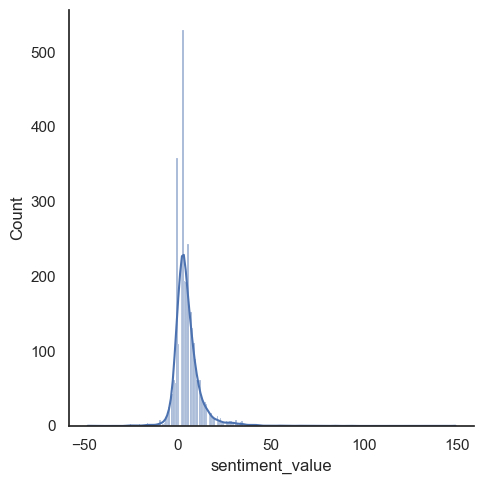

In [62]:
sns.set_style(style='white') 
sns.displot(videoGames['sentiment_value'],kde=True)
plt.show()

In [63]:
videoGames['index']=range(0,len(videoGames))

In [64]:
videoGames['word_count'] = videoGames['reviewText'].str.split().apply(len)

<Axes: xlabel='index', ylabel='sentiment_value'>

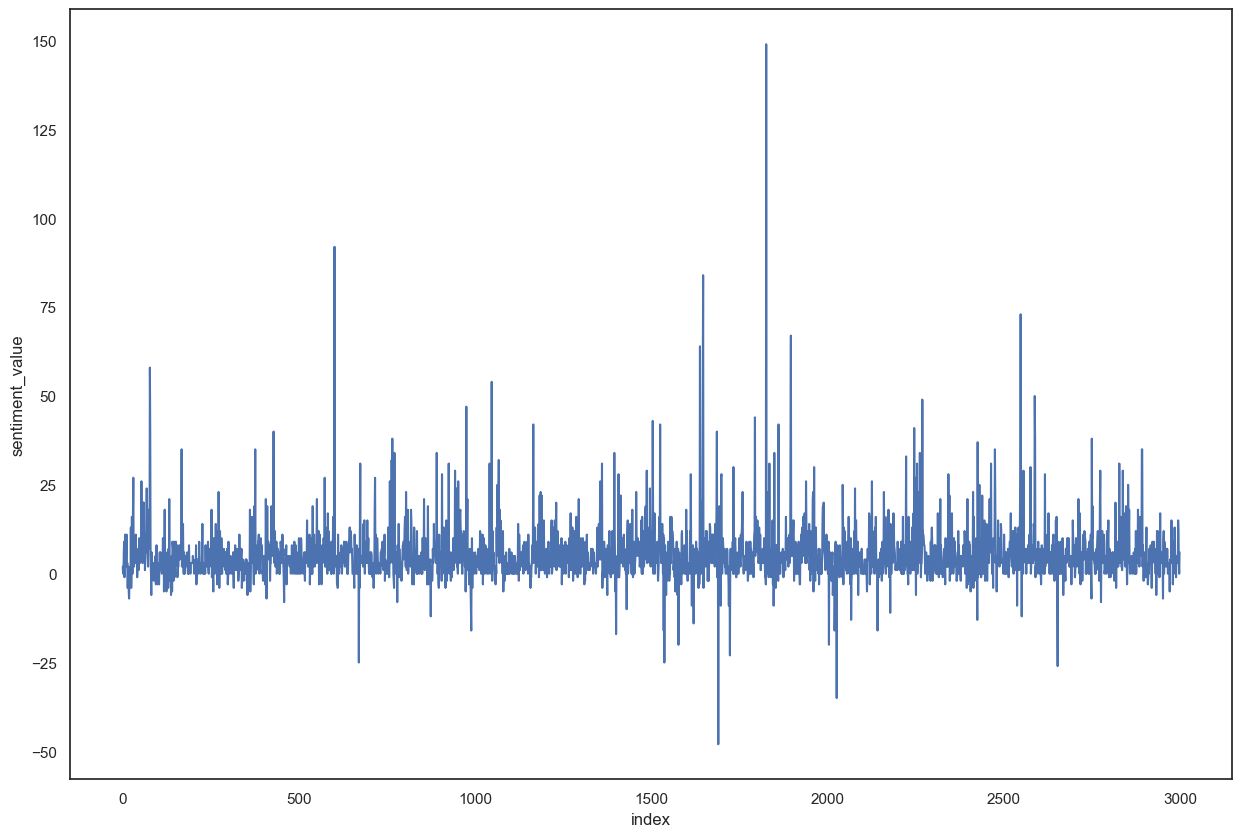

In [65]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=videoGames)

From this plot we can visualize the behaviour of sentiment values across the data, with highest and lowest spikes being the reviews having the highest and the lowest sentimental values of all the other reviews.

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

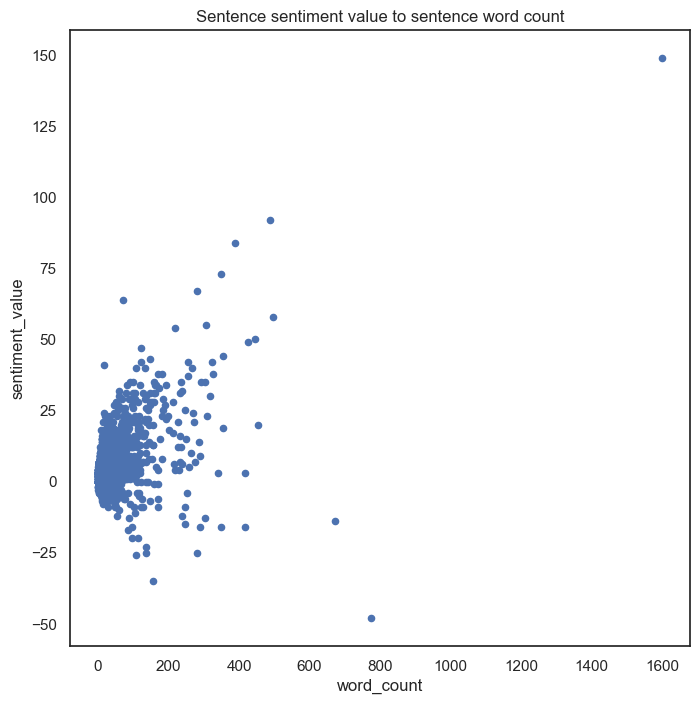

In [66]:
videoGames.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

From this plot we can see that most of the reviews were having words less than 200 per review. 